In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
data = sns.load_dataset("flights")
data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [3]:
data["date"] = pd.to_datetime(
    data["year"].astype(str) + "-" + data["month"].astype(str)
)

ts = data.set_index("date")["passengers"]
ts.head()

/var/folders/vx/bt98j0q121dd2w3k6_lm79k40000gn/T/ipykernel_44873/1263380495.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["date"] = pd.to_datetime(


date
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: passengers, dtype: int64

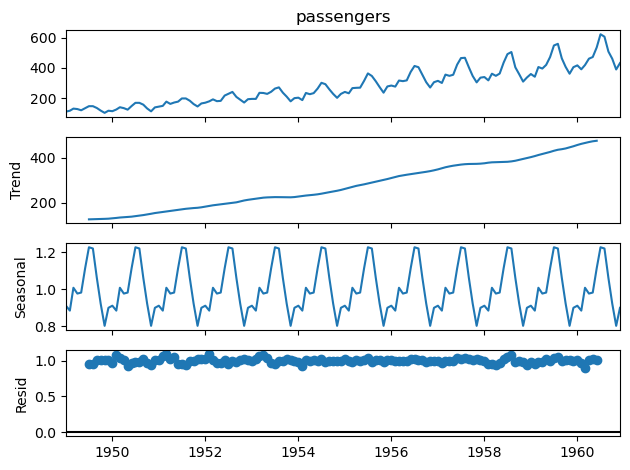

In [4]:
decomp = seasonal_decompose(ts, model="multiplicative", period=12)
decomp.plot();


In [5]:
def check_stationarity(x, name="serie"):
    adf = adfuller(x.dropna())

    print(f"--- {name} ---")
    print(f"ADF p-value  : {adf[1]:.4f}")


In [6]:
check_stationarity(ts, "AirPassengers original")

--- AirPassengers original ---
ADF p-value  : 0.9919


In [17]:
log_ts = np.log(ts)
check_stationarity(log_ts, "Log AirPassengers")


--- Log AirPassengers ---
ADF p-value  : 0.4224


In [18]:
d1 = log_ts.diff()
check_stationarity(d1, "Log + diff(1)")


--- Log + diff(1) ---
ADF p-value  : 0.0711


In [21]:
d12 = d1.diff(2)
check_stationarity(d12, "Log + diff(1) + diff(12)")


--- Log + diff(1) + diff(12) ---
ADF p-value  : 0.0000


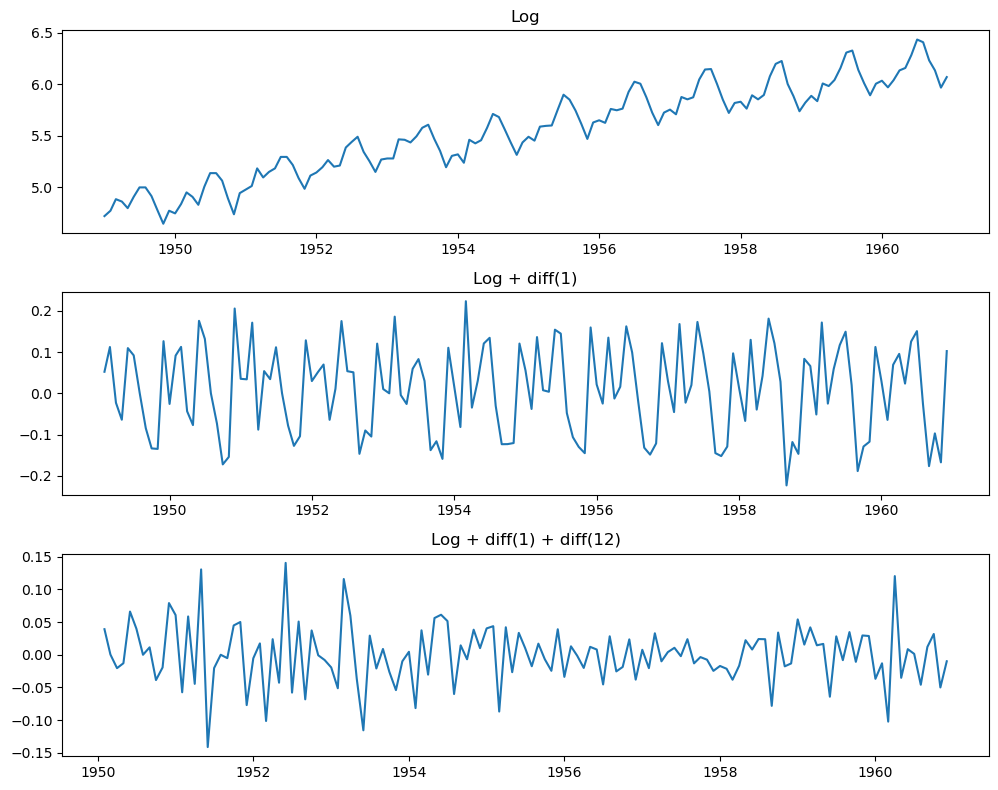

In [20]:
fig, axes = plt.subplots(3, 1, figsize=(10, 8))
axes[0].plot(log_ts); axes[0].set_title("Log")
axes[1].plot(log_ts.diff()); axes[1].set_title("Log + diff(1)")
axes[2].plot(log_ts.diff().diff(12)); axes[2].set_title("Log + diff(1) + diff(12)")
plt.tight_layout()